In [38]:
%pip install nltk
%pip install tweepy
%pip install pandas
%pip install wordcloud
%pip install textblob
%pip install seaborn
%pip install tensorflow
%pip install sklearn
%pip install zemberek-python
%pip install trnltk
%pip install git+https://github.com/emres/turkish-deasciifier.git
%pip install transformers datasets
%pip install torch
%pip install tensorflow
%pip install pyautogui
%pip install snowballstemmer
%pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

  Running command git clone --filter=blob:none --quiet https://github.com/emres/turkish-deasciifier.git 'C:\Users\cemke\AppData\Local\Temp\pip-req-build-in95qo8o'


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [39]:
#!/usr/bin/env python
#-*-coding:utf-8-*-
from zemberek import (
    TurkishSpellChecker,
    TurkishSentenceNormalizer,
    TurkishSentenceExtractor,
    TurkishMorphology,
    TurkishTokenizer
)
import pyautogui
import tweepy
import csv
import sys
import time
import re
from tqdm import tqdm
import warnings
import string
import pandas as pd
import ast
import nltk
from snowballstemmer import TurkishStemmer as snowTurkish
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as st
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer
from tweepy import Stream ,OAuthHandler
from tweepy.streaming import Stream
from wordcloud import WordCloud
from textblob import TextBlob
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.utils.data_utils import pad_sequences
from trnlp import TrnlpWord
from trnlp import *
from transformers import AutoModelForSequenceClassification , AutoTokenizer, TextClassificationPipeline, pipeline, AutoModelWithLMHead,AutoModel
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\cemke\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cemke\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cemke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cemke\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [56]:
class getTweets:
    
    def __init__(self,ckey,csecret,atoken,asecret):
        self.api=None
        self.consumer_key = ckey
        self.consumer_secret = csecret
        self.access_token = atoken
        self.access_token_secret = asecret
        
    def setAuth(self):
        try:
            self.auth = tweepy.OAuthHandler(self.consumer_key, self.consumer_secret)
            self.auth.set_access_token(self.access_token, self.access_token_secret)
            self.api = tweepy.API(self.auth)            
            print ("Baƒülantƒ± Yapƒ±ldƒ±!")                           
        except tweepy.TweepError as err:
            print('Error: {}'.format(err))   
    
    def toDataFrame(tweets):
        try:
            print ("Veriler Kayƒ±t Ediliyor...")
            pd.set_option('display.max_rows', None)
            pd.set_option('display.max_columns', None)
            pd.set_option('display.width', None)
            pd.set_option('display.max_colwidth', None)
            DataSet = pd.DataFrame()
            
            DataSet['Kullanƒ±cƒ±_Adƒ±'] = [tweet.user.name for tweet in tweets]
            DataSet['Tweet_Tarih'] = [tweet.created_at for tweet in tweets]   
            #DataSet['Tweet_Id'] = [tweet.id for tweet in tweets]
            DataSet['Tweet'] = [tweet.full_text for tweet in tweets]
            #DataSet['Tweet_Degistirilmis'] = [tweet.full_text for tweet in tweets]
            #DataSet['Tweet_Ceviri']=[tweet.full_text for tweet in tweets]            
            #DataSet['Kullanƒ±cƒ±_Id'] = [tweet.user.id for tweet in tweets]  
                
            #DataSet['Dil'] = [tweet.lang for tweet in tweets]
            DataSet.to_csv('Datasets/tw.csv',index=False)
            print ("Veriler Kayƒ±t Edildi!")
            return DataSet
        except Exception as err:
            print('Error: {}'.format(err))
    
    def searchTweet(self,arananTweet):
        self.setAuth()
        try:                      
            print ("Kelimeye Uygun Tweetler Sorgulanƒ±yor...")
            cursor = tweepy.Cursor(self.api.search_tweets, q=arananTweet,result_type="new", lang='tr',tweet_mode="extended")
            results=[]
            for item in cursor.items(150):
                results.append(item)
            print ("Kelimeye Uygun Tweetler Sorgulandƒ±!")
            DataSet = getTweets.toDataFrame(results)            
        except Exception as err:
            print('Error: {}'.format(err))
        finally:
            Dataset=pd.read_csv('Datasets/tw.csv',encoding="utf-8")                   
            getTweets.TweetClear(DataSet)#Tweet Temizlemek i√ßin
            getTweets.SentenceNormalization(DataSet)#T√ºrk√ße hatalƒ± yazƒ±lmƒ±≈ü kelimeleri d√ºzeltmek i√ßin
            getTweets.TweetTranslate(DataSet)#Tweetleri ƒ∞ngilizceye √ßevirmek i√ßin
            getTweets.EngWordSeparation(DataSet)#ƒ∞ngilizce kelime Stopwords 
            getTweets.TrWordSeparation(DataSet)#T√ºrk√ße kelime Stopwords
            getTweets.ToxicSentence(DataSet)#ƒ∞ngilizce Argo c√ºmle bulmak i√ßin             
            getTweets.TrStemmed(DataSet)#T√ºrk√ße Kelime k√∂klerini almak i√ßin
            getTweets.EngStemmed(DataSet)#ƒ∞ngilizce Kelime k√∂klerini almak i√ßin
            getTweets.TextblobSentiment(DataSet)#Textblob Duygu Analizi (Kelime pozitif negatif olarak sorguluyor)           
            DataSet.to_csv('Datasets/tw.csv',index=False)

    def TextblobSentiment(DataSet):
        try:
            data=DataSet
            print ("Duygu Analizi Yapƒ±lƒ±yor...")            
            data["T√ºr"] = data["Tweet_Ayrƒ±_Eng"].apply(getTweets.getPolarity)
            data["Yoƒüunluk"] = data["Tweet_Ayrƒ±_Eng"].apply(getTweets.getSubjectivity)
            data.to_csv('Datasets/textblob_eng_duygu.csv',index=False)
            print("Duygu Analizi Yapƒ±ldƒ±!")                        
        except Exception as err:
            print('Error: {}'.format(err)) 
            
    def TweetClear(DataSet):
        try:
            data=DataSet
            print ("Tweetler Temizleniyor...")
            data["Tweet_Clear"]=data["Tweet"]
            pattern = re.compile('http[s]?://(?:[a-zA-Z0-9ƒü√º≈ü√∂√ßƒ±ƒ∞ƒû√ú≈û√ñ√á]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F]))+|#[a-zA-Z0-9ƒü√º≈ü√∂√ßƒ±ƒ∞ƒû√ú≈û√ñ√á]+|$[a-zA-Zƒü√º≈ü√∂√ßƒ±ƒ∞ƒû√ú≈û√ñ√á]+|@[a-zA-Z0-9ƒü√º≈ü√∂√ßƒ±ƒ∞ƒû√ú≈û√ñ√á_]+|[,.^_$*%-;È∂Ø!?‚Äô"‚Äú‚Äù:=|‚Ä¶#]+|\n+|amp[\s]+|gt;')
            for index in range(len(data["Tweet_Clear"])):        
                data["Tweet_Clear"][index]=pattern.sub(' ', data["Tweet_Clear"][index])    
                data["Tweet_Clear"][index]=data["Tweet_Clear"][index].lower()              
            data["Tweet_Clear"]=data["Tweet_Clear"].str.replace("[^\w\s]","")
            print ("Tweetler Temizlendi!")
            return data
        except Exception as err:
            print('Error: {}'.format(err))  
                              
    def TweetTranslate(DataSet):
        try:
            data=DataSet
            print ("Tweetler √áeviriliyor...")
            data["Tweet_Eng"]=data["Tweet_Clear"]
            for index in range(len(data["Tweet_Eng"])):
                Ceviri_Blob=TextBlob(data["Tweet_Eng"][index])
                Eng_Blob=Ceviri_Blob.translate(from_lang='tr', to='en')  
                data["Tweet_Eng"][index]=Eng_Blob  
                data["Tweet_Eng"][index]=data["Tweet_Eng"][index].lower()
            print ("Tweetler √áevirildi!")                      
            return data      
        except Exception as err:
            print('Error: {}'.format(err)) 
            
    def SentenceNormalization(DataSet):
        try:
            data=DataSet
            print("C√ºmle Normalizasyonu Yapƒ±lƒ±yor...")
            morphology = TurkishMorphology.create_with_defaults()
            normalizer = TurkishSentenceNormalizer(morphology)
            for index in range(len(data["Tweet_Clear"])):                
                data["Tweet_Clear"][index]= normalizer.normalize(data["Tweet_Clear"][index].lower())
            print("C√ºmle Normalizasyonu Yapƒ±ldƒ±!")
            return data
        except Exception as err:
            print('Error: {}'.format(err))
            
    def TrWordSeparation(DataSet):
        try:
            data=DataSet
            print("T√ºrk√ße Kelime Ayrƒ±≈ütƒ±rma Yapƒ±lƒ±yor...")
            data["Tweet_Ayrƒ±_TR"]=data["Tweet_Clear"]
            for index in range(len(data["Tweet_Ayrƒ±_TR"])):
                data["Tweet_Ayrƒ±_TR"][index] = simple_token(data["Tweet_Ayrƒ±_TR"][index], sw=stopwords)
            data["Tweet_Ayrƒ±_TR"] = data["Tweet_Ayrƒ±_TR"].str.join(" ")
            print("T√ºrk√ße Kelime Ayrƒ±≈ütƒ±rma Yapƒ±ldƒ±!")
            return data
        except Exception as err:
            print('Error: {}'.format(err))  
                  
    def EngWordSeparation(DataSet):
        try:
            data=DataSet
            print("ƒ∞ngilizce Kelime Ayrƒ±≈ütƒ±rma Yapƒ±lƒ±yor...")
            additional  = ['sq','gt','mk','aq','qq','amk']
            stop = st.words('english')
            
            data["Tweet_Ayrƒ±_Eng"] = data["Tweet_Eng"].str.split()           
            data["Tweet_Ayrƒ±_Eng"] = data["Tweet_Ayrƒ±_Eng"].apply(lambda x: [item for item in x if item not in stop])
            data["Tweet_Ayrƒ±_Eng"] = data["Tweet_Ayrƒ±_Eng"].apply(lambda x: [item for item in x if item not in additional])
            data["Tweet_Ayrƒ±_Eng"] = data["Tweet_Ayrƒ±_Eng"].str.join(" ")
            print("ƒ∞ngilizce Kelime Ayrƒ±≈ütƒ±rma Yapƒ±ldƒ±!")
            return data
        except Exception as err:
            print('Error: {}'.format(err))
            
    def TrStemmed(DataSet):
        try:
            data=DataSet
            data["TR_K√∂k"] = data["Tweet_Ayrƒ±_TR"]
            # K√∂k Bulma
            stemmer = snowTurkish()

            stemmed_lists = []
            for index in tqdm(data["TR_K√∂k"].index):
                mini_l = []
                for text in data.loc[index]["TR_K√∂k"].split(" "):
                    mini_l.append(stemmer.stemWord(text))

                big_text=" "
                for char in mini_l:
                    big_text = big_text + " " + char
                stemmed_lists.append(big_text)
    
            DataSet['TR_K√∂k'] = stemmed_lists
            return data
        except Exception as err:
            print('Error: {}'.format(err))
            
    def EngStemmed(DataSet):
        try:
            data=DataSet
            data["Eng_K√∂k"] = data["Tweet_Ayrƒ±_Eng"]
            # K√∂k Bulma
            stemmer = PorterStemmer()

            stemmed_lists = []
            for index in tqdm(data["Eng_K√∂k"].index):
                mini_l = []
                for text in data.loc[index]["Eng_K√∂k"].split(" "):
                    mini_l.append(stemmer.stem(text))

                big_text=" "
                for char in mini_l:
                    big_text = big_text + " " + char
                stemmed_lists.append(big_text)
    
            DataSet['Eng_K√∂k'] = stemmed_lists
            return data
        except Exception as err:
            print('Error: {}'.format(err))
            
    def ToxicSentence(DataSet):
        try:
            data=DataSet
            print("Toxic C√ºmle Analizi Yapƒ±lƒ±yor...")
            model_path ="martin-ha/toxic-comment-model"
            tokenizer=AutoTokenizer.from_pretrained(model_path)
            model=AutoModelForSequenceClassification.from_pretrained(model_path)
            pipeline=TextClassificationPipeline(model=model, tokenizer=tokenizer)
            data["Tweet_Toxic"]=data["Tweet_Eng"]
            temp=data["Tweet_Clear"]
            for index in range(len(data["Tweet_Toxic"])):
                sonuc=pipeline(str(data["Tweet_Toxic"][index]))
                if sonuc[0]['label']=="toxic":
                    data["Tweet_Toxic"][index]="Toxic"
                else:
                    data["Tweet_Toxic"][index]="Toxic deƒüil"    
            print("Toxic C√ºmle Analizi Yapƒ±ldƒ±!")
            return data  
        except Exception as err:
            print('Error: {}'.format(err))
        
    def getSubjectivity(DataSet):
        try: 
            sub=TextBlob(DataSet).sentiment.subjectivity               
            if sub >=0.75:
                return "%75 - %100"
            elif sub >=0.5 and sub <0.75:
                return "%50 - %75"
            elif sub >=0.25 and sub <0.50:
                return "%25 - %50"
            else:
                return "0 - 25%"
        except Exception as err:
            print('Error: {}'.format(err))
            
    def getPolarity(DataSet):
        try:
            pol=TextBlob(DataSet).sentiment.polarity
            if pol>0.1:
                return "Pozitif"
            elif pol<-0.1:
                return "Negatif"
            else:
                return "N√∂tr"
        except Exception as err:
            print('Error: {}'.format(err))

In [41]:
tw = getTweets( 
ckey = 'o7qidRODRWm5u07PtAWrCpSqf',
csecret = '1Yn60OYMJl5kRCSM0XQ4Lskxh6hjM4VMz51OdsS6dM9DQuQ4MV',
atoken = '1315792402234441730-Dt7AydgVGYI5VN9RRQfnR8Endh0WAc',
asecret = 'jhfiDfB53Z27EqHfvfKbNdo0w2SWLqyyoAkILqgSoaGMK'
)
while True:
    aramaTuru=pyautogui.confirm('Ne T√ºr Bir Arama Yapacaksƒ±nƒ±z?',title='Arama T√ºr√º', buttons=['Hastag','Kelime','Kullanƒ±cƒ±'])
    if aramaTuru=="Hastag":
        arananKelime=pyautogui.prompt(text="Aranacak Kelimeyi Girin:", title='Aranacak Kelime' , default='python')
        temp=("#"+arananKelime+" -filter:retweets")
        tw.searchTweet(arananTweet=temp)
        secim=pyautogui.confirm(text='Tekrar Denemek ƒ∞ster Misiniz?', title='Hata', buttons=["Tekrar","ƒ∞ptal"])
        if secim=="Tekrar":
            continue
        else:
            break
    elif aramaTuru=='Kelime':
        arananKelime=pyautogui.prompt(text="Aranacak Kelimeyi Girin:", title='Aranacak Kelime' , default='python')
        temp=(arananKelime+" -filter:retweets")
        tw.searchTweet(arananTweet=temp)
        secim=pyautogui.confirm(text='Tekrar Denemek ƒ∞ster Misiniz?', title='Hata', buttons=["Tekrar","ƒ∞ptal"])
        if secim=="Tekrar":
            continue
        else:
            break
    elif aramaTuru=='Kullanƒ±cƒ±':
        arananKelime=pyautogui.prompt(text="Aranacak Kelimeyi Girin:", title='Aranacak Kelime' , default='python')
        temp=("@"+arananKelime+" -filter:retweets")
        tw.searchTweet(temp)
        secim=pyautogui.confirm(text='Tekrar Denemek ƒ∞ster Misiniz?', title='Hata', buttons=["Tekrar","ƒ∞ptal"])
        if secim=="Tekrar":
            continue
        else:
            break
    else:
        secim=pyautogui.confirm(text='Hatalƒ± Se√ßim Yaptƒ±nƒ±z Tekrar Denemek ƒ∞ster Misiniz?', title='Hata', buttons=["Tekrar","Kapat"])
        if secim=="Tekrar":
            continue
        else:
            break


Baƒülantƒ± Yapƒ±ldƒ±!
Kelimeye Uygun Tweetler Sorgulanƒ±yor...
Kelimeye Uygun Tweetler Sorgulandƒ±!
Veriler Kayƒ±t Ediliyor...
Veriler Kayƒ±t Edildi!
Tweetler Temizleniyor...
Tweetler Temizlendi!
C√ºmle Normalizasyonu Yapƒ±lƒ±yor...
2023-01-16 07:29:29,814 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 9.963012933731079

C√ºmle Normalizasyonu Yapƒ±ldƒ±!
Tweetler √áeviriliyor...
Tweetler √áevirildi!
ƒ∞ngilizce Kelime Ayrƒ±≈ütƒ±rma Yapƒ±lƒ±yor...
ƒ∞ngilizce Kelime Ayrƒ±≈ütƒ±rma Yapƒ±ldƒ±!
T√ºrk√ße Kelime Ayrƒ±≈ütƒ±rma Yapƒ±lƒ±yor...
T√ºrk√ße Kelime Ayrƒ±≈ütƒ±rma Yapƒ±ldƒ±!
Toxic C√ºmle Analizi Yapƒ±lƒ±yor...
Toxic C√ºmle Analizi Yapƒ±ldƒ±!


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 150/150 [00:00<00:00, 3571.67it/s]


Duygu Analizi Yapƒ±lƒ±yor...
Duygu Analizi Yapƒ±ldƒ±!


In [42]:
Veri=pd.read_csv('Datasets/textblob_eng_duygu.csv')
Veri.head(20)

Kullanƒ±cƒ±_Adƒ±                Tweet_Tarih  \
0                              Cicibebece  2023-01-16 04:28:48+00:00   
1                        gadevnganger doo  2023-01-16 04:27:45+00:00   
2                                  mahoni  2023-01-16 04:25:50+00:00   
3                             ùêÑùêçùêÑùêí ùêéùêëùêÄùêã Ô£ø  2023-01-16 04:25:15+00:00   
4                                  zeynep  2023-01-16 04:24:32+00:00   
5                           Hasan Cicekci  2023-01-16 04:24:20+00:00   
6                   mert ama duruma baƒülƒ±  2023-01-16 04:24:03+00:00   
7                         Ece Tuƒü√ßem üè≥Ô∏è‚Äçüåà  2023-01-16 04:21:45+00:00   
8                              bora kƒ±lƒ±√ß  2023-01-16 04:21:42+00:00   
9                                  Nermin  2023-01-16 04:17:49+00:00   
10                          Hasan Cicekci  2023-01-16 04:17:12+00:00   
11                         Cemal Ekenoglu  2023-01-16 04:16:08+00:00   
12                                 zehhü´∂üèª  2023-01-16 04:14:33+00:00   
13                     Emre_ƒ∞lhan 35&07 ü¶Ç  2023-01-16 04:14:18+00:00   
14                               Dabadaba  2023-01-16 04:13:58+00:00   
15  DR. √úROLOJƒ∞K ACƒ∞L Gƒ∞Rƒ∞≈ûƒ∞M D√ú≈û√úN√úLMEDƒ∞  2023-01-16 04:13:37+00:00   
16                                   umut  2023-01-16 04:13:07+00:00   
17                                    zey  2023-01-16 04:12:28+00:00   
18                        FEDAYƒ∞ TURKOƒûLU  2023-01-16 04:12:14+00:00   
19                     hayaller ger√ßekler  2023-01-16 04:11:16+00:00   

                                                                                                                                                                                                                                                                                         Tweet  \
0                                                                                                                                                                                                                                                regl sancƒ±sƒ±ndan yamularak kahve i√ßen o kƒ±z..   
1                                                                                                                                                                                  #bayrakli ≈üirinyer  tamamen dƒ±≈üarƒ±da bƒ±rakƒ±ldƒ± ve yerine ba≈üka bir √ßay ka≈üƒ±ƒüƒ± kahve https://t.co/ceL7czNRtF   
2                                                                                                                                                                           eƒüer ben isteseydim ben d√ºnyanƒ±n en b√ºy√ºk a≈üƒ±ƒüƒ± olabilirdim ama i≈üim var kahve i√ßiyorumüòÄüòÄüòÄ https://t.co/oobxwkSPwz   
3                                                                                                                                                                                                                     @kvefsaneleri Biz kƒ±rk yƒ±ldƒ±r ne bo≈üuna kahve i√ßtik ne bo≈üuna acƒ± √ßektik   
4                                                                                                                                                                                                            @pvrisgay bence cok l√ºks ve asiri bi kahvalti bende cogu zaman kahve bile olmuyor   
5                                                                                             @sergioneer @turkoshitpost Sakin ol knk 5 saniyede dikiyon √ºst√ºne su i√ßiyon 10 saniyede bi≈üeyin kalmƒ±yo ama kassƒ±yonuz bu kahve olayƒ±nƒ± sanki 83717 tuƒüla ta≈üƒ±yƒ±p alƒ±yon kƒ±zƒ± bi tuzlu kahve ney   
6                                                                                                                                                                                                  G√ºnaydƒ±n r√ºyamda bah√ßeliyle yenicumada kahve i√ßiyoduk, bu hafta da sa√ßma ge√ßicek belli oldu   
7                                                       

### BERT MODEL

In [43]:
Veri1=pd.read_csv('Datasets/textblob_eng_duygu.csv',usecols=['Tweet','T√ºr','Yoƒüunluk','Tweet_Clear'])
# Eƒüitilmi≈ü Aƒüƒ±rlƒ±klarƒ±n Y√ºklenmesi

model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")

sentiment_analysis_pipeline= pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)
sentiment_result=[]
for text in tqdm(Veri1["Tweet_Clear"]):
    result = sentiment_analysis_pipeline(text)[0]
    sentiment_result.append(result)
        
sentiment_result = pd.DataFrame(sentiment_result)
tweets = pd.concat([Veri1,sentiment_result],axis=1)
tweets.label = tweets.label.map({'positive':'Pozitif','negative':'Negatif'})
tweets.to_csv("Datasets/Bert_Tr_Sonuc.csv",index=False)

Veri2=pd.read_csv("Datasets/Bert_Tr_Sonuc.csv")
Veri2.head()

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 150/150 [00:05<00:00, 26.50it/s]


Tweet  \
0                                                                       regl sancƒ±sƒ±ndan yamularak kahve i√ßen o kƒ±z..   
1         #bayrakli ≈üirinyer  tamamen dƒ±≈üarƒ±da bƒ±rakƒ±ldƒ± ve yerine ba≈üka bir √ßay ka≈üƒ±ƒüƒ± kahve https://t.co/ceL7czNRtF   
2  eƒüer ben isteseydim ben d√ºnyanƒ±n en b√ºy√ºk a≈üƒ±ƒüƒ± olabilirdim ama i≈üim var kahve i√ßiyorumüòÄüòÄüòÄ https://t.co/oobxwkSPwz   
3                                            @kvefsaneleri Biz kƒ±rk yƒ±ldƒ±r ne bo≈üuna kahve i√ßtik ne bo≈üuna acƒ± √ßektik   
4                                   @pvrisgay bence cok l√ºks ve asiri bi kahvalti bende cogu zaman kahve bile olmuyor   

                                                                               Tweet_Clear  \
0                                              regl sancƒ±sƒ±ndan yamularak kahve i√ßen o kƒ±z   
1                 ≈üirinyer tamamen dƒ±≈üarƒ±da bƒ±rakƒ±ldƒ± ve yerine ba≈üka bir √ßay ka≈üƒ±ƒüƒ± kahve   
2  eƒüer ben isteseydim ben d√ºnyanƒ±n en b√ºy√ºk a≈üƒ±ƒüƒ± olabilirdim ama i≈üim var kahve i√ßiyorum   
3                               biz kƒ±rk yƒ±ldƒ±r ne bo≈üuna kahve i√ßtik ne bo≈üuna acƒ± √ßektik   
4                 bence √ßok l√ºks ve a≈üƒ±rƒ± bir kahvaltƒ± bende √ßoƒüu zaman kahve bile olmuyor   

       T√ºr    Yoƒüunluk    label     score  
0     N√∂tr     0 - 25%  Negatif  0.995374  
1     N√∂tr     0 - 25%  Negatif  0.999148  
2     N√∂tr     0 - 25%  Negatif  0.777929  
3     N√∂tr     0 - 25%  Negatif  0.926829  
4  Negatif  %75 - %100  Negatif  0.999344

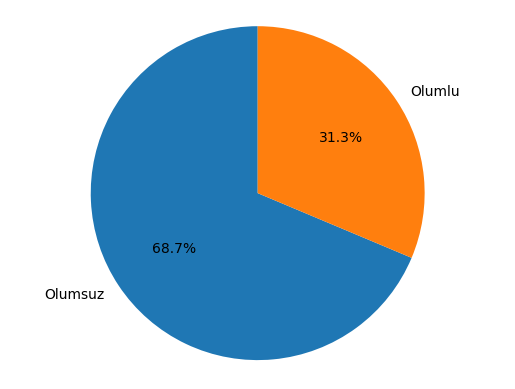

In [44]:
labels = Veri2.label.map({"Pozitif":'Olumlu',"Negatif":'Olumsuz'}).value_counts().index.values
sizes = Veri2.label.value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90,explode=None)
ax1.axis('equal')
plt.show()

### ELECTRA (BERT MODEL TABANLI)

In [61]:

Veri1=pd.read_csv('Datasets/textblob_eng_duygu.csv',usecols=['Tweet','T√ºr','Yoƒüunluk','Tweet_Clear'])
# Eƒüitilmi≈ü Aƒüƒ±rlƒ±klarƒ±n Y√ºklenmesi

tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-cased")

model = AutoModel.from_pretrained("dbmdz/bert-base-turkish-cased")

sentiment_analysis_pipeline= pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)
sentiment_result=[]
for text in tqdm(Veri1["Tweet_Clear"]):
    result = sentiment_analysis_pipeline(text)
    sentiment_result.append(result)
        
sentiment_result = pd.DataFrame(sentiment_result)
tweets = pd.concat([Veri1,sentiment_result],axis=1)
tweets.label = tweets.label.map({'positive':'Pozitif','negative':'Negatif'})
tweets.to_csv("Datasets/Bert_Tr_Sonuc2.csv",index=False)

Veri2=pd.read_csv("Datasets/Bert_Tr_Sonuc2.csv")
Veri2.head()

Some weights of the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
The model 'BertModel' is not supported for sentiment-analysis. Supported models are ['AlbertForSequenceClassifi

KeyError: 'logits'

### Vader Sentiment

In [58]:
sid_obj= SentimentIntensityAnalyzer()
Veri1=pd.read_csv('Datasets/textblob_eng_duygu.csv',usecols=['Tweet','T√ºr','Yoƒüunluk','Tweet_Clear','Tweet_Eng','Tweet_Ayrƒ±_Eng'])
sentiment_result=[]
for text in tqdm(Veri1["Tweet_Ayrƒ±_Eng"]):
    result = sid_obj.polarity_scores(text)
    sentiment_result.append(result)
        
sentiment_result = pd.DataFrame(sentiment_result)
tweets = pd.concat([Veri1,sentiment_result],axis=1)
tweets.columns = tweets.columns.map({'pos':'Pozitif','neg':'Negatif','neu':'N√∂tr','compound':'Yoƒüunluk'})
tweets.to_csv("Datasets/Vader_Tr_Sonuc.csv",index=False)

Veri2=pd.read_csv("Datasets/Vader_Tr_Sonuc.csv")
Veri2.head(20)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 150/150 [00:00<00:00, 18757.51it/s]


Unnamed: 0  \
0                                                                                                                                                                                                                                                regl sancƒ±sƒ±ndan yamularak kahve i√ßen o kƒ±z..   
1                                                                                                                                                                                  #bayrakli ≈üirinyer  tamamen dƒ±≈üarƒ±da bƒ±rakƒ±ldƒ± ve yerine ba≈üka bir √ßay ka≈üƒ±ƒüƒ± kahve https://t.co/ceL7czNRtF   
2                                                                                                                                                                           eƒüer ben isteseydim ben d√ºnyanƒ±n en b√ºy√ºk a≈üƒ±ƒüƒ± olabilirdim ama i≈üim var kahve i√ßiyorumüòÄüòÄüòÄ https://t.co/oobxwkSPwz   
3                                                                                                                                                                                                                     @kvefsaneleri Biz kƒ±rk yƒ±ldƒ±r ne bo≈üuna kahve i√ßtik ne bo≈üuna acƒ± √ßektik   
4                                                                                                                                                                                                            @pvrisgay bence cok l√ºks ve asiri bi kahvalti bende cogu zaman kahve bile olmuyor   
5                                                                                             @sergioneer @turkoshitpost Sakin ol knk 5 saniyede dikiyon √ºst√ºne su i√ßiyon 10 saniyede bi≈üeyin kalmƒ±yo ama kassƒ±yonuz bu kahve olayƒ±nƒ± sanki 83717 tuƒüla ta≈üƒ±yƒ±p alƒ±yon kƒ±zƒ± bi tuzlu kahve ney   
6                                                                                                                                                                                                  G√ºnaydƒ±n r√ºyamda bah√ßeliyle yenicumada kahve i√ßiyoduk, bu hafta da sa√ßma ge√ßicek belli oldu   
7                                                                                                                      yatarken ≈üunu ≈üunu giyerim, ayaƒüƒ±ma da bunu diye uyudum ama ruh halim hi√ß o kombine uymuyor, kahve elimde ba≈üƒ±mdaki havlu neredeyse d√º≈üt√º d√º≈üecek √∂yle dolaba bakƒ±yorum   
8                                                                      @Haluk_Yurekli Hava limanƒ±nda denk gelmi≈ü kahve i√ßiyorlar ne var bunda ve TFF den sadece Hamit var hamite en alt tabakadan zaten sizin y√ºneticiler kahve ƒ±smarlamasƒ±nƒ± bilmedikleri i√ßin size ters geliyor b√∂yle ≈üeyler   
9            @trtturku G√ºnaydƒ±n Pƒ±nar Hanƒ±m. Ho≈ü geldiniz, sefalar getirdiniz. Ge√ßmi≈ü olsun.\nSƒ±radaki t√ºrk√ºler "TRT T√ºrk√º'n√ºn"birbirinden deƒüerli ekibine, t√ºrk√º dostlarƒ±na, kƒ±zƒ±m Burcu'ya ve bana gelsin. Ho≈ü√ßa ve saƒülƒ±cakla kalƒ±nƒ±z. Kahve tadƒ±nda bir g√ºn olsun. https://t.co/DGKR1N6ghm   
10                                                                                            @EnesOkullu @turkoshitpost Sakin ol knk 5 saniyede dikiyon √ºst√ºne su i√ßiyon 10 saniyede bi≈üeyin kalmƒ±yo ama kassƒ±yonuz bu kahve olayƒ±nƒ± sanki 83717 tuƒüla ta≈üƒ±yƒ±p alƒ±yon kƒ±zƒ± bi tuzlu kahve ney   
11                                                                                                                                                                        Herkesin g√ºn√º kendi kahvesinin tadƒ± gibi olsun :)) Ben kahve olmayan okulda d√∂nemi bitiriyorum bug√ºn üòÑüòÑüòÑG√ºnaydƒ±n‚òïÔ∏è‚òïÔ∏è   
12                                                                                  gunaydin tiviti atmadan g√ºne baslayamiyomusum bir de kahve icmeden ‚òïÔ∏è gunaydiiinnnü™ª yeni gunde ≈üifa bekleyenlere ≈üifa, huzur bekleyenlere huzur, haber bekleyenlere hayƒ±rlƒ± haberler nasip et Allahƒ±m Amin   
13                                           

In [47]:
Veri3=pd.read_csv('Datasets/textblob_eng_duygu.csv',usecols=['Tweet','T√ºr','Yoƒüunluk','Tweet_Clear'])
Veri3["T√ºr"].value_counts()

N√∂tr       85
Pozitif    49
Negatif    16
Name: T√ºr, dtype: int64

<AxesSubplot:xlabel='T√ºr', ylabel='count'>

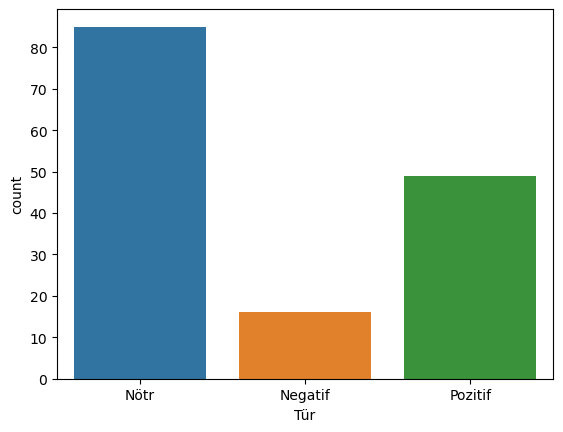

In [48]:
sns.countplot(Veri3["T√ºr"])

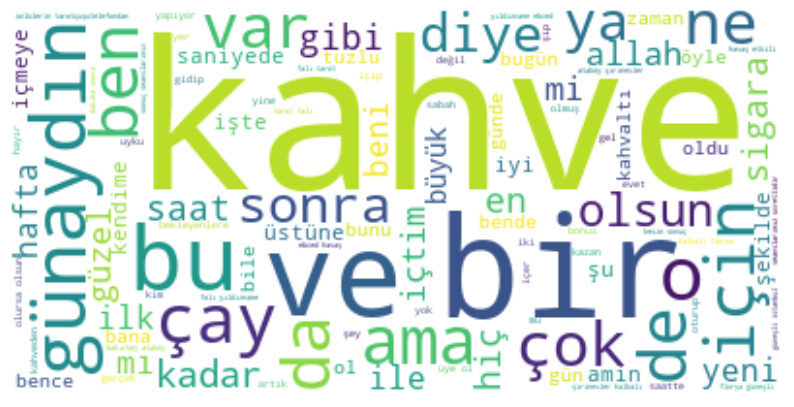

In [49]:
text = " ".join(review for review in Veri3["Tweet_Clear"])
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [50]:
max_words = 500
max_len= 40

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', Veri3['Tweet_Clear'][0])
X, tokenizer = tokenize_pad_sequences(Veri3['Tweet_Clear'])
print('After Tokenization & Padding \n', X[0])



Before Tokenization & Padding 
 regl sancƒ±sƒ±ndan yamularak kahve i√ßen o kƒ±z
After Tokenization & Padding 
 [250 251 252   1 253   5 111   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]


In [51]:
vocab_size = tokenizer.document_count

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16),
    tf.keras.layers.LSTM(16, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          2400      
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 4,563
Trainable params: 4,563
Non-trainable params: 0
_________________________________________________________________


In [52]:
y = pd.get_dummies(Veri3['T√ºr'])
train_data, test_data, train_label, test_label = train_test_split(X, y, test_size=0.10, random_state=42)

print('Train Set ->', train_data.shape, train_label.shape)
print('Test Set ->', test_data.shape, test_label.shape)



Train Set -> (135, 40) (135, 3)
Test Set -> (15, 40) (15, 3)
